In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd

# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('./health.csv')

# Display the first 5 rows to verify the data was loaded correctly


In [4]:
df.head()

,patientid,healthassessmentid,assessment_date,n_assessment,assessment_number,final_assessment,assessment_year,assessment_type,assessment_quarter,assessment_month,...,imd_idaopi_score,glucose,tot_cholesterol,alcohol_consumption,regular_exercise,t2dm_nice,prediabetic,first_to_last,days_between_ha,years_between_ha
0,0x0001EC929E1AB41684A7B5528628E4B7,0x97B5EB4313702E21828DD59E5BC4F085,13oct2017,1,1,1,2017,1,4,10,...,0.024,3.8,4.68,1,0,0,0,NaN,NaN,NaN
1,0x0004022CC26B79C37471E953F521D0DC,0x786B53CCD0FF6397100F4080465628E0,01may2018,1,1,1,2018,4,2,5,...,0.110,5.3,6.20,1,1,0,0,NaN,NaN,NaN
2,0x00044057F135CC6526BE752AD83115F6,0x6B04800E0E852F8C997D9AD8019B868E,13apr2018,1,1,1,2018,3,2,4,...,0.120,5.6,6.10,2,1,0,1,NaN,NaN,NaN
3,0x000527A13F12637CFD34616163AFBC48,0xB0E4800F18AD1367A01658AA1A7736EF,12may2014,2,1,0,2014,4,2,5,...,0.071,5.9,4.60,0,1,0,1,NaN,NaN,NaN
4,0x000527A13F12637CFD34616163AFBC48,0x6A1A149F1B99B942F3C3938A85799151,21mar2016,2,2,1,2016,4,1,3,...,0.071,5.3,4.40,0,1,0,0,2.0,679.0,2.0


In [5]:
# Exploratory Data Analysis on health dataset

# 1. Dataset Overview
print("Dataset shape:", df.shape)
print("\nColumn data types:")
print(df.dtypes.value_counts())

# 2. Summary statistics for numerical columns
print("\nSummary statistics for key health metrics:")
health_metrics = ['age', 'weight', 'height', 'bmi', 'systolic', 'diastolic', 'glucose']
print(df[health_metrics].describe())


Dataset shape: (117219, 137)

Column data types:
int64      81
float64    53
object      3
dtype: int64

Summary statistics for key health metrics:
                 age         weight         height            bmi  \
count  117219.000000  117219.000000  117219.000000  117219.000000   
mean       43.798446      78.939272     174.882314      25.695993   
std        10.392776      15.269166       9.251438       3.983410   
min        18.000000      34.100000     136.000000      13.488390   
25%        36.000000      68.300000     168.000000      23.017820   
50%        44.000000      78.500000     176.000000      25.186481   
75%        51.000000      88.100000     182.000000      27.774422   
max       116.000000     194.400000     210.000000      58.688560   

            systolic      diastolic        glucose  
count  117219.000000  117219.000000  117219.000000  
mean      119.026301      76.967736       5.214050  
std        13.492361       9.064768       0.858831  
min        68.0000

In [6]:

# 3. Missing value analysis
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print("\nTop 10 columns with highest missing values:")
print(missing_data.nlargest(10, 'Percentage'))

# 4. Target variable analysis
print("\nTarget variable distribution:")
print(df['prediabetic'].value_counts(normalize=True).mul(100).round(2))
print(df['prediabetic'].value_counts())



Top 10 columns with highest missing values:
                    Missing Values  Percentage
first_to_last                98312   83.870362
days_between_ha              93306   79.599724
years_between_ha             93306   79.599724
workrelatedstress_            3414    2.912497
malaria_                      2187    1.865738
hiatusernia_                  2069    1.765072
gastriculcer_                 2062    1.759100
duodenalulcer_                1849    1.577389
highbp_                       1833    1.563740
mumpsinadulthood_             1820    1.552649

Target variable distribution:
0    77.43
1    22.57
Name: prediabetic, dtype: float64
0    90764
1    26455
Name: prediabetic, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

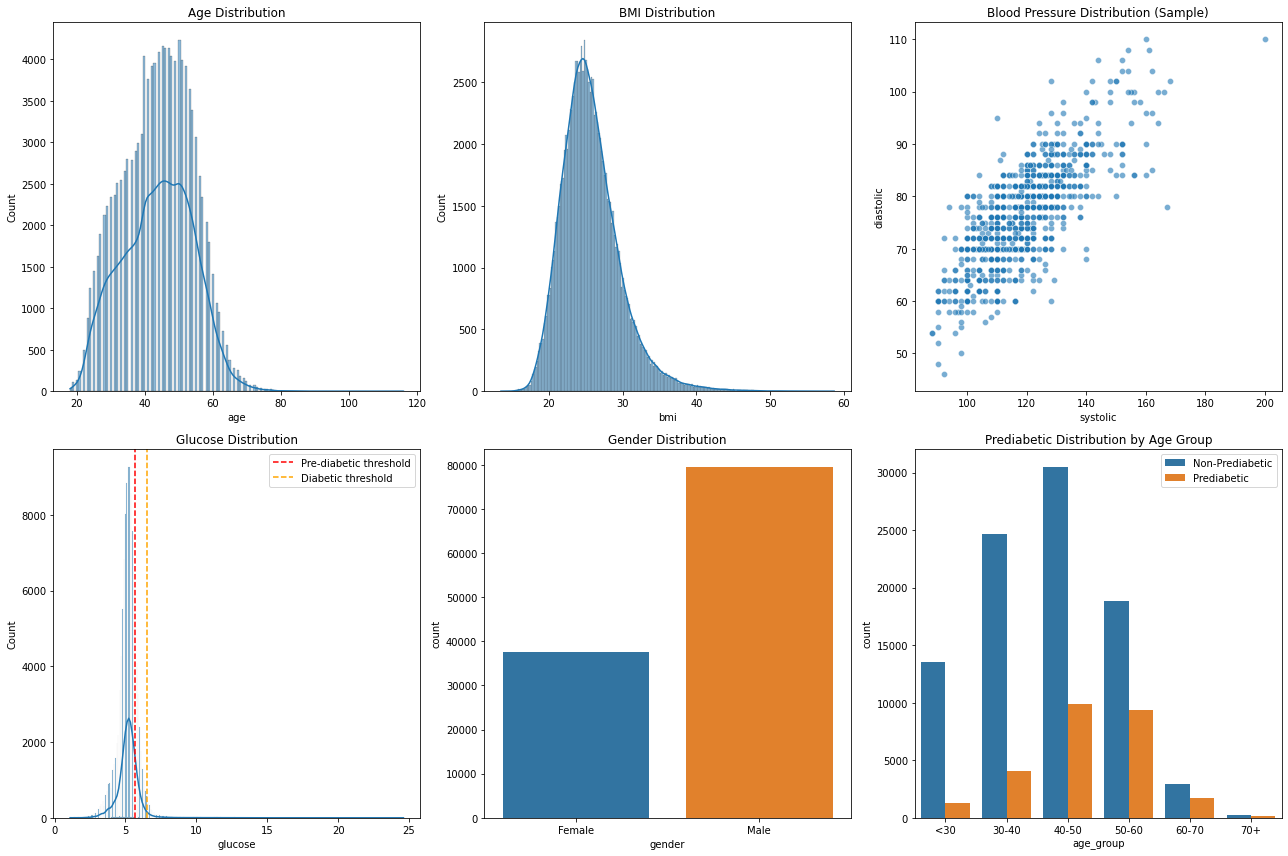

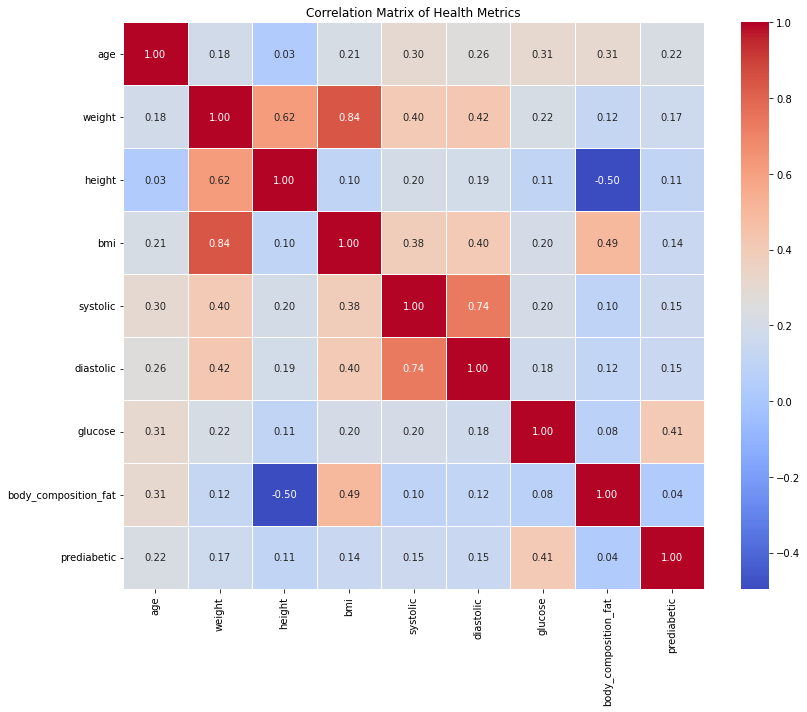

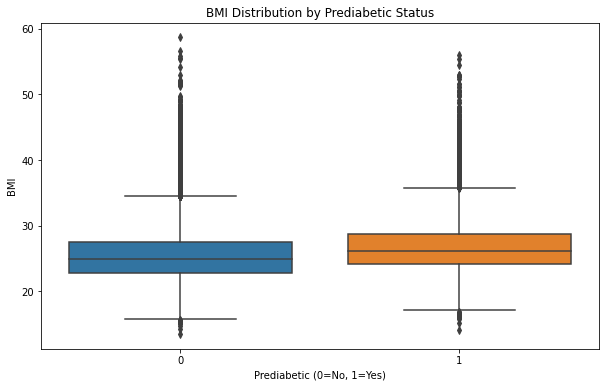

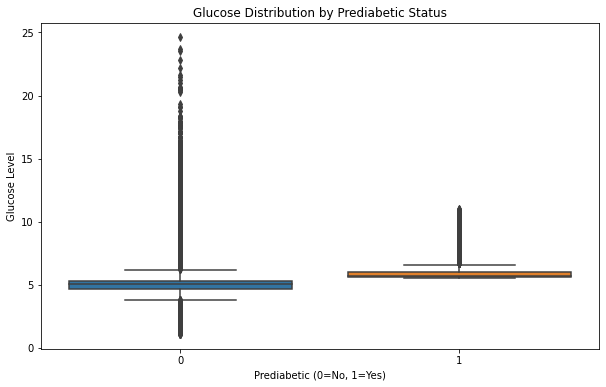

In [11]:
# 5. Visualize key metrics

# Create a figure with multiple subplots
plt.figure(figsize=(18, 12))

# Age distribution
plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
# BMI distribution
plt.subplot(2, 3, 2)
sns.histplot(df['bmi'].dropna(), kde=True)
plt.title('BMI Distribution')

# Blood pressure distribution
plt.subplot(2, 3, 3)
sns.scatterplot(x='systolic', y='diastolic', data=df.sample(1000), alpha=0.6)
plt.title('Blood Pressure Distribution (Sample)')

# Glucose levels
plt.subplot(2, 3, 4)
sns.histplot(df['glucose'].dropna(), kde=True)
plt.title('Glucose Distribution')
plt.axvline(x=5.7, color='r', linestyle='--', label='Pre-diabetic threshold')
plt.axvline(x=6.5, color='orange', linestyle='--', label='Diabetic threshold')
plt.legend()

# Gender distribution
plt.subplot(2, 3, 5)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Female', 'Male'])

# Prediabetic by age groups
plt.subplot(2, 3, 6)
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 70, 100], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
sns.countplot(x='age_group', hue='prediabetic', data=df)
plt.title('Prediabetic Distribution by Age Group')
plt.legend(['Non-Prediabetic', 'Prediabetic'])

plt.tight_layout()
plt.show()

# 6. Correlation analysis for numerical features
corr_cols = ['age', 'weight', 'height', 'bmi', 'systolic', 'diastolic', 'glucose', 
             'body_composition_fat', 'prediabetic']
             
plt.figure(figsize=(12, 10))
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Health Metrics')
plt.tight_layout()
plt.show()

# 7. Analyze relationship between BMI and prediabetic status
plt.figure(figsize=(10, 6))
sns.boxplot(x='prediabetic', y='bmi', data=df)
plt.title('BMI Distribution by Prediabetic Status')
plt.xlabel('Prediabetic (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()

# 8. Relationship between glucose levels and prediabetic status
plt.figure(figsize=(10, 6))
sns.boxplot(x='prediabetic', y='glucose', data=df)
plt.title('Glucose Distribution by Prediabetic Status')
plt.xlabel('Prediabetic (0=No, 1=Yes)')
plt.ylabel('Glucose Level')
plt.show()



In [13]:

# 9. Summary of findings
print("\nSummary of key findings:")
print(f"- Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"- Prediabetic prevalence: {df['prediabetic'].mean()*100:.2f}%")
print(f"- Average age: {df['age'].mean():.2f} years")
print(f"- Average BMI: {df['bmi'].mean():.2f}")
print(f"- Average glucose: {df['glucose'].mean():.2f}")
print(f"- Gender distribution: {df['gender'].value_counts(normalize=True).mul(100).round(2).to_dict()}")

# Remove temporary column
df.drop('age_group', axis=1, inplace=True)


Summary of key findings:
- Dataset has 117219 rows and 138 columns
- Prediabetic prevalence: 22.57%
- Average age: 43.80 years
- Average BMI: 25.70
- Average glucose: 5.21
- Gender distribution: {1: 67.93, 0: 32.07}


Dataset shape: (117219, 138)

Target variable distribution:
0    77.431133
1    22.568867
Name: prediabetic, dtype: float64

Features with >50% missing values:
                  Missing Values  Percentage
first_to_last              98312   83.870362
days_between_ha            93306   79.599724
years_between_ha           93306   79.599724


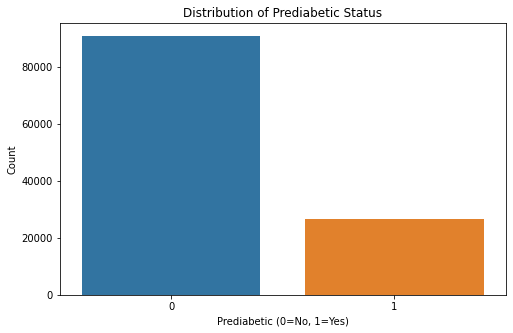


Applying SMOTE to handle class imbalance...
Class distribution after SMOTE: [72611 72611]

Logistic Regression Performance:
Accuracy: 0.9997
Precision: 0.9991
Recall: 0.9996
F1 Score: 0.9993
AUC-ROC: 0.9995


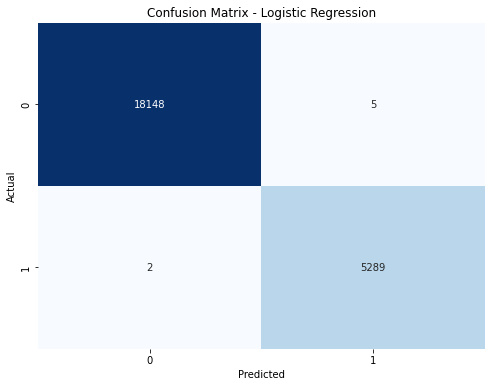


Random Forest Performance:
Accuracy: 0.9954
Precision: 0.9981
Recall: 0.9813
F1 Score: 0.9896
AUC-ROC: 0.9999


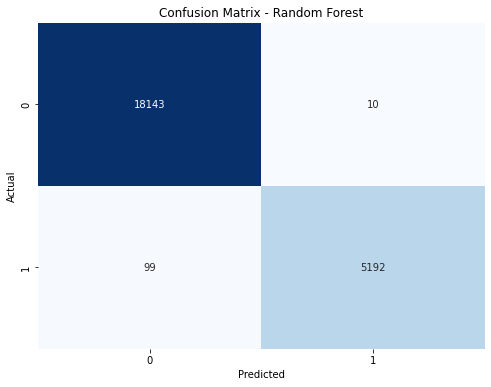

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Set seed for reproducibility
np.random.seed(42)

# 1. Exploratory Data Analysis
print("Dataset shape:", df.shape)
print("\nTarget variable distribution:")
print(df['prediabetic'].value_counts(normalize=True) * 100)

# Check missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print("\nFeatures with >50% missing values:")
print(missing_data[missing_data['Percentage'] > 50].sort_values('Percentage', ascending=False).head())

# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='prediabetic', data=df)
plt.title('Distribution of Prediabetic Status')
plt.xlabel('Prediabetic (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# 2. Data Preprocessing
# Remove features with too many missing values (>50%) and non-predictive columns
cols_to_drop = missing_data[missing_data['Percentage'] > 50].index.tolist()
cols_to_drop += ['patientid', 'healthassessmentid', 'assessment_date']  # Non-predictive columns
X = df.drop(cols_to_drop + ['prediabetic'], axis=1)
y = df['prediabetic']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Check for class imbalance and apply SMOTE if needed
class_counts = y_train.value_counts()
if class_counts[0] / class_counts[1] > 3 or class_counts[1] / class_counts[0] > 3:
    print("\nApplying SMOTE to handle class imbalance...")
    smote = SMOTE(random_state=42)
    X_train_preprocessed, y_train = smote.fit_resample(X_train_preprocessed, y_train)
    print("Class distribution after SMOTE:", np.bincount(y_train))

# 3. Model Building and Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate AUC-ROC if possible
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if auc_roc:
        print(f"AUC-ROC: {auc_roc:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Feature importance (if available)
    if hasattr(model, 'feature_importances_'):
        feature_importance(model, X, preprocessor, model_name)
    
    return model, accuracy, precision, recall, f1, auc_roc

def feature_importance(model, X, preprocessor, model_name):
    if not hasattr(model, 'feature_importances_'):
        return
        
    # Get feature names
    feature_names = []
    for name, transformer, cols in preprocessor.transformers_:
        if name == 'cat':
            # Get the one-hot encoder
            ohe = transformer.named_steps['onehot']
            # Get all categories
            categories = ohe.categories_
            for i, category in enumerate(categories):
                feature_names.extend([f"{cols[i]}_{c}" for c in category])
        else:
            feature_names.extend(cols)
    
    # Get feature importances
    importances = model.feature_importances_
    
    # Create DataFrame of features and importances
    if len(importances) == len(feature_names):
        feature_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_imp = feature_imp.sort_values('Importance', ascending=False)
        
        # Plot top 20 features
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_imp.head(20))
        plt.title(f'Top 20 Feature Importances - {model_name}')
        plt.tight_layout()
        plt.show()

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, class_weight='balanced', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model_result = evaluate_model(model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, name)
    results[name] = model_result

# Find best model based on AUC-ROC
best_model_name = max(results, key=lambda x: results[x][5] if results[x][5] is not None else 0)
best_model = results[best_model_name][0]
print(f"\nBest performing model: {best_model_name}")

# 4. ROC Curve Comparison
plt.figure(figsize=(10, 8))
for name, (model, _, _, _, _, _) in results.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# 5. Save best model results
best_metrics = {
    'model_name': best_model_name,
    'accuracy': results[best_model_name][1],
    'precision': results[best_model_name][2],
    'recall': results[best_model_name][3],
    'f1': results[best_model_name][4],
    'auc_roc': results[best_model_name][5]
}

print("\nBest Model Performance Summary:")
for metric, value in best_metrics.items():
    if metric != 'model_name' and value is not None:
        print(f"{metric}: {value:.4f}")